In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow
import numpy as np
from tensorflow.keras.datasets import mnist
import string
import re
import time
import matplotlib.pyplot as plt
from neuralnet import *
from layers import *
from losses import *


imgres = 28 # Resolution of images
num_classes = 10

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.array(x_train, dtype=float)/255
x_test = np.array(x_test, dtype=float)/255
x_train = np.reshape(x_train, (x_train.shape[0], imgres**2))
x_test = np.reshape(x_test, (x_test.shape[0], imgres**2))
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)

In [4]:
n_layers = 2
nn = NeuralNet(x_train.shape[1], softmax_est_crossentropy_deriv)
sz = 20
print("Layers: ")
for k in range(n_layers):
    print(sz, end=",")
    nn.add_layer(sz, leaky_relu, leaky_relu_deriv)
    sz*=2
print("\n=======================")
nn.add_layer(10, softmax, None)

n_iters = 60
alpha = 0.01
losses = []
acc = []

for it in range(n_iters):
    tic = time.time()
    print(it, end='')
    # Stochastic gradient descent
    for idx, k in enumerate(np.random.permutation(x_train.shape[0])):
        if idx%1000 == 0:
            print(".", end='')
        h = nn.backprop_descent(x_train[k, :], y_train[k, :], alpha)


    num_correct = 0
    loss = 0
    for i in range(x_test.shape[0]):
        y_est = np.argmax(nn.forward(x_test[i, :]))
        #loss += softmax_est_crossentropy_loss(h, y_test[i])
        num_correct += y_est == y_test[i]
    acc.append(num_correct/x_test.shape[0])
    losses.append(loss)
    print(acc[-1])
    print("Elapsed Time: {:.3f}".format(time.time()-tic))

Layers: 
20,40,
0............................................................0.8565
Elapsed Time: 8.937
1............................................................0.8886
Elapsed Time: 8.885
2............................................................0.905
Elapsed Time: 9.030
3............................................................0.9173
Elapsed Time: 9.036
4............................................................0.9173
Elapsed Time: 8.878
5............................................................0.9296
Elapsed Time: 8.908
6............................................................0.9343
Elapsed Time: 8.793
7............................................................0.9322
Elapsed Time: 8.862
8............................................................0.9419
Elapsed Time: 8.869
9............................................................0.9445
Elapsed Time: 8.827
10............................................................0.9459
Elapsed Time: 8.843
11..............

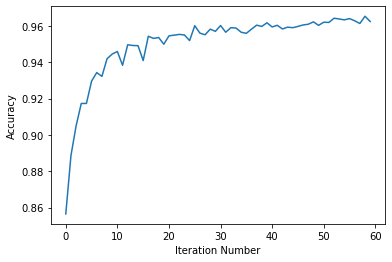

In [5]:
plt.plot(acc)
plt.xlabel("Iteration Number")
plt.ylabel("Accuracy")
plt.savefig("Accuracy.png")

In [6]:
n_layers = 2
nn = NeuralNet(x_train.shape[1], softmax_est_crossentropy_deriv)
sz = 20
print("Layers: ")
for k in range(n_layers):
    print(sz, end=",")
    nn.add_layer(sz, leaky_relu, leaky_relu_deriv)
    sz *= 2
print("\n=======================")
nn.add_layer(40, leaky_relu, leaky_relu_deriv)
nn.add_layer(10, softmax, None)


n_iters = 60
alpha = 0.01
losses = []
acc = []

for it in range(n_iters):
    tic = time.time()
    print(it, end='')
    # Stochastic gradient descent
    for idx, k in enumerate(np.random.permutation(x_train.shape[0])):
        if idx%1000 == 0:
            print(".", end='')
        h = nn.backprop_descent(x_train[k, :], y_train[k, :], alpha)


    num_correct = 0
    loss = 0
    for i in range(x_test.shape[0]):
        y_est = np.argmax(nn.forward(x_test[i, :]))
        #loss += softmax_est_crossentropy_loss(h, y_test[i])
        num_correct += y_est == y_test[i]
    acc.append(num_correct/x_test.shape[0])
    losses.append(loss)
    print(acc[-1])
    print("Elapsed Time: {:.3f}".format(time.time()-tic))

Layers: 
20,40,
0............................................................0.098
Elapsed Time: 10.997
1............................................................0.098
Elapsed Time: 11.007
2............................................................0.098
Elapsed Time: 10.871
3............................................................0.098
Elapsed Time: 10.855
4............................................................0.098
Elapsed Time: 10.874
5............................................................0.098
Elapsed Time: 10.866
6............................................................0.098
Elapsed Time: 10.830
7............................................................0.098
Elapsed Time: 10.867
8............................................................0.098
Elapsed Time: 10.809
9............................................................0.098
Elapsed Time: 10.858
10............................................................0.098
Elapsed Time: 10.826
11.............

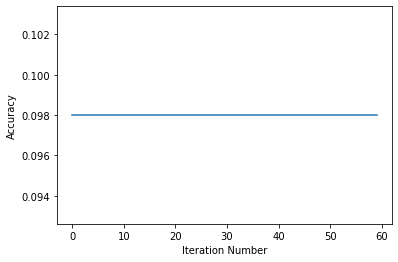

In [7]:
plt.plot(acc)
plt.xlabel("Iteration Number")
plt.ylabel("Accuracy")
plt.savefig("Accuracy.png")